In [13]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

plt.rcParams['figure.figsize'] = [20, 7]

In [2]:
train_df = pd.read_csv('train.csv')
# df = DataFrame - podstawowy typ danych w pandasie, taki jakby spreadsheet albo tabela SQL
print(type(train_df))
print(train_df)
print(type(train_df['date']))

<class 'pandas.core.frame.DataFrame'>
              id        date  store_nbr                      family     sales  \
0              0  2013-01-01          1                  AUTOMOTIVE     0.000   
1              1  2013-01-01          1                   BABY CARE     0.000   
2              2  2013-01-01          1                      BEAUTY     0.000   
3              3  2013-01-01          1                   BEVERAGES     0.000   
4              4  2013-01-01          1                       BOOKS     0.000   
...          ...         ...        ...                         ...       ...   
3000883  3000883  2017-08-15          9                     POULTRY   438.133   
3000884  3000884  2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885  2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887  2017-08-15          9                     SEAFOOD    

In [3]:
# przyklad - wyciagniecie danych o sprzedazy miesa w sklepie nr 1 w 2013 roku
temp_df = train_df.loc[(pd.to_datetime(train_df['date']).dt.year == 2013) & (train_df['family']== 'MEATS') & (train_df['store_nbr']==1)]
print(len(temp_df))
print(temp_df)
# temp_df = train_df.set_index(['store_nbr', 'family', 'date']).sort_index()

364
            id        date  store_nbr family    sales  onpromotion
24          24  2013-01-01          1  MEATS    0.000            0
1806      1806  2013-01-02          1  MEATS  369.101            0
3588      3588  2013-01-03          1  MEATS  272.319            0
5370      5370  2013-01-04          1  MEATS  454.172            0
7152      7152  2013-01-05          1  MEATS  328.940            0
...        ...         ...        ...    ...      ...          ...
639762  639762  2013-12-27          1  MEATS  852.764            0
641544  641544  2013-12-28          1  MEATS  313.632            0
643326  643326  2013-12-29          1  MEATS  290.857            0
645108  645108  2013-12-30          1  MEATS  227.476            0
646890  646890  2013-12-31          1  MEATS  155.308            0

[364 rows x 6 columns]


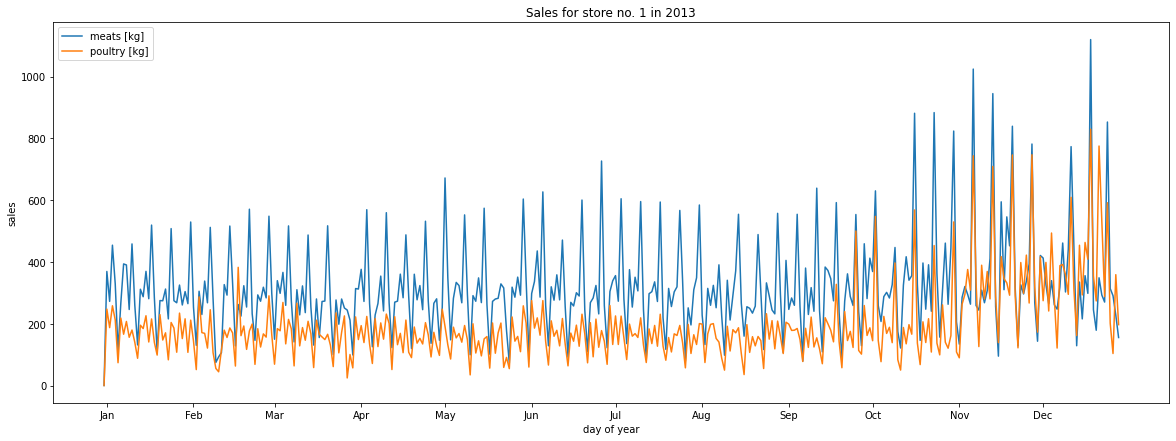

In [4]:
#plt.style.use('fivethirtyeight')
#dodanie danych z poprzedniego bloku do plota
fig, ax = plt.subplots()
x=temp_df['date']
meats_y=temp_df['sales']
plt.title("Sales for store no. 1 in 2013")
ax.plot(x,meats_y, label="meats [kg]")
#dodanie danych o sprzedaży drobiu w tym samym sklepie w tym samym okresie
temp_df = train_df.loc[(pd.to_datetime(train_df['date']).dt.year == 2013) & (train_df['family']== 'POULTRY') & (train_df['store_nbr']==1)]
poultry_y = temp_df['sales']
ax.plot(x,poultry_y, label="poultry [kg]")
#konfiguracja wykresu
plt.xlabel("day of year")
plt.ylabel("sales")
month_starts = [1,32,61,92,122,153,183,214,245,275,306,336]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 

ax.set_xticks(month_starts)
ax.set_xticklabels(month_names)
plt.legend()

plt.show()

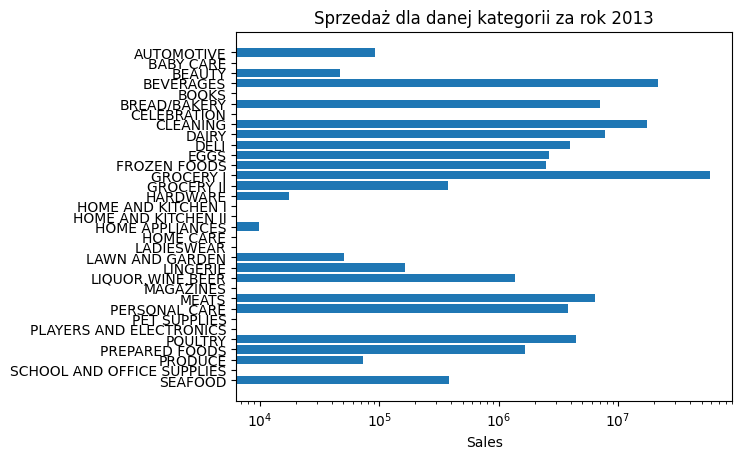

In [5]:
families = train_df['family'].drop_duplicates()
temp_df = 0
listt = []
plt.rcdefaults()
for family in families:
    temp_df = train_df.loc[(pd.to_datetime(train_df['date']).dt.year == 2013) & (train_df['family'] == family)]
    series_y = temp_df['sales']
    sum_y = sum(series_y)
    listt.append(sum_y)

ax = plt.subplot()

y_pos = np.arange(len(families))

ax.barh(y_pos, listt, align='center')
ax.set_yticks(y_pos, labels=families)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Sales')
ax.set_xscale('log')

# plt.xlabel("family")
# plt.ylabel("sales in 2013")
# plt.legend()
plt.title("Sprzedaż dla danej kategorii za rok 2013")
plt.show()


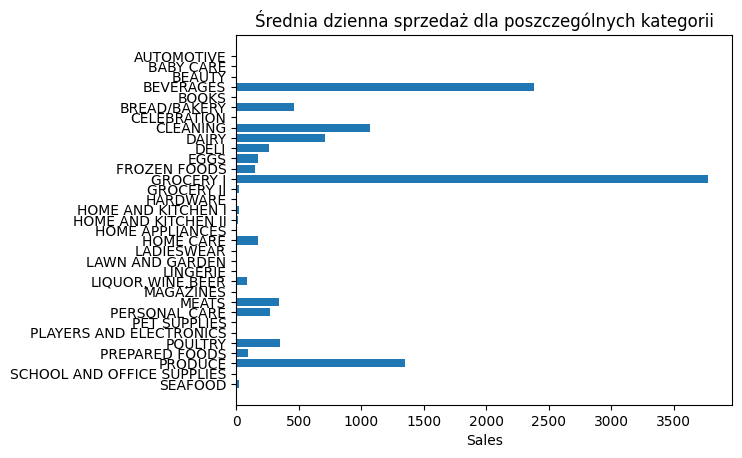

In [6]:
families = train_df['family'].drop_duplicates()
temp_df = 0
listt = []
plt.rcdefaults()
for family in families:
    temp_df = train_df.loc[(train_df['family'] == family)]
    series_y = temp_df['sales']
    avg_sum_y = sum(series_y) / len(series_y)
    listt.append(avg_sum_y)

ax = plt.subplot()

y_pos = np.arange(len(families))

ax.barh(y_pos, listt, align='center')
ax.set_yticks(y_pos, labels=families)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Sales')
plt.title("Średnia dzienna sprzedaż dla poszczególnych kategorii")
plt.show()

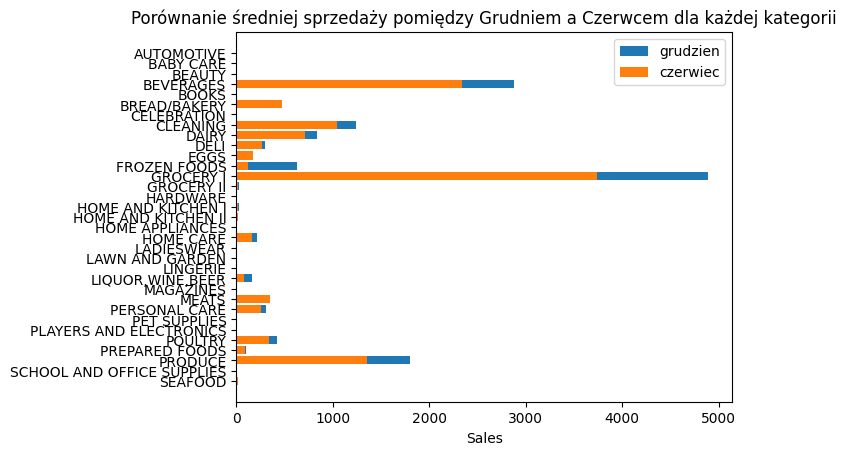

In [7]:
families = train_df['family'].drop_duplicates()
temp_df = 0
listt_dec = []
listt_jun = []
plt.rcdefaults()
for family in families:
    temp_df_dec = train_df.loc[(pd.to_datetime(train_df['date']).dt.month == 12) & (train_df['family'] == family)]
    temp_df_jun = train_df.loc[(pd.to_datetime(train_df['date']).dt.month == 6) & (train_df['family'] == family)]
    series_y_dec = temp_df_dec['sales']
    series_y_jun = temp_df_jun['sales']
    avg_sum_y_dec = sum(series_y_dec) / len(series_y_dec)
    avg_sum_y_jun = sum(series_y_jun) / len(series_y_jun)
    listt_dec.append(avg_sum_y_dec)
    listt_jun.append(avg_sum_y_jun)

ax = plt.subplot()

y_pos = np.arange(len(families))

ax.barh(y_pos, listt_dec, align='center', label='grudzien')
ax.barh(y_pos, listt_jun, align='center', label='czerwiec')
ax.set_yticks(y_pos, labels=families)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Sales')
plt.title("Porównanie średniej sprzedaży pomiędzy Grudniem a Czerwcem dla każdej kategorii")
plt.legend()
plt.show()

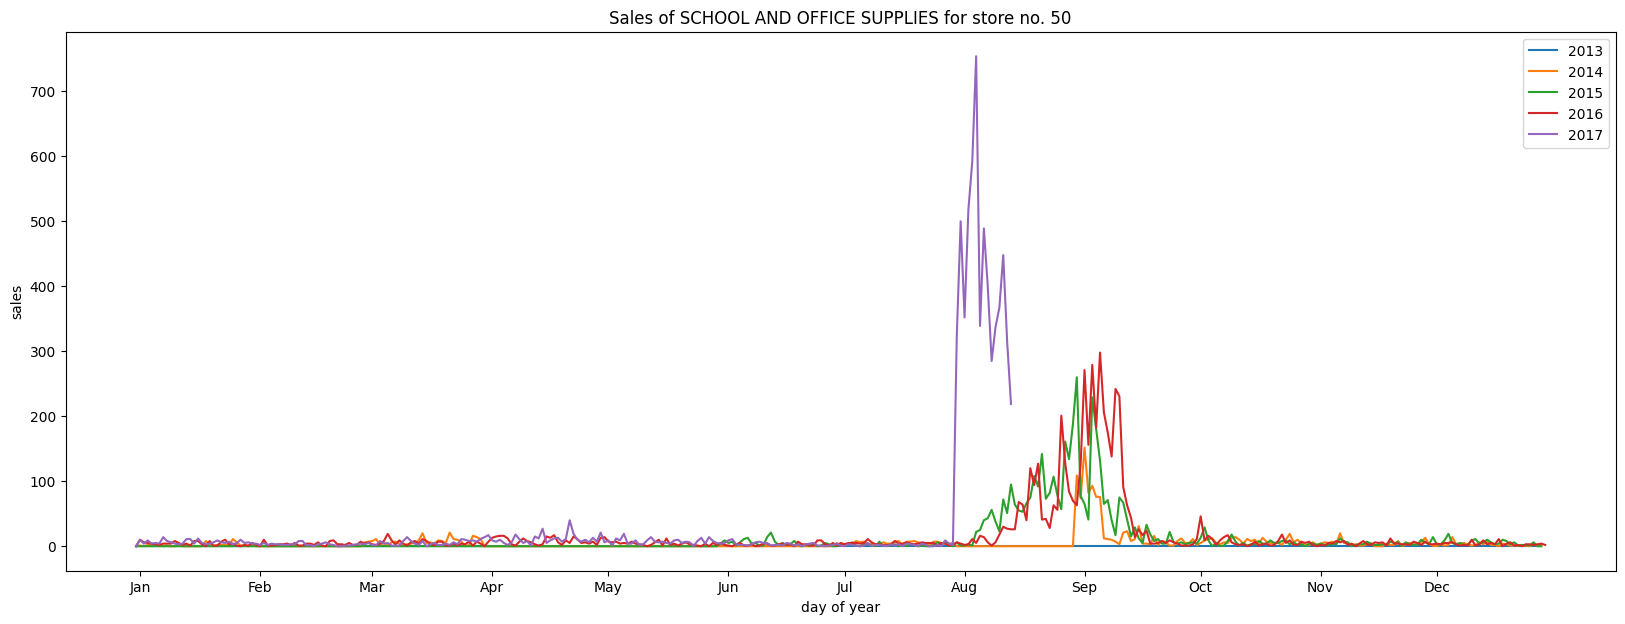

In [21]:
fig, ax = plt.subplots()

STORE_NBR=50
FAMILY='SCHOOL AND OFFICE SUPPLIES'
# FAMILY='AUTOMOTIVE'
# FAMILY='BEVERAGES'
# FAMILY='PRODUCE'

plt.title(f"Sales of {FAMILY} for store no. {STORE_NBR}")

temp_df = train_df.loc[(pd.to_datetime(train_df['date']).dt.year == 2013) & (train_df['family'] == FAMILY) & (train_df['store_nbr'] == STORE_NBR)]
school2013=temp_df['sales']
x=np.arange(len(school2013))
ax.plot(x,school2013, label="2013")

temp_df = train_df.loc[(pd.to_datetime(train_df['date']).dt.year == 2014) & (train_df['family'] == FAMILY) & (train_df['store_nbr'] == STORE_NBR)]
school2014=temp_df['sales']
x=np.arange(len(school2014))
ax.plot(x,school2014, label="2014")

temp_df = train_df.loc[(pd.to_datetime(train_df['date']).dt.year == 2015) & (train_df['family'] == FAMILY) & (train_df['store_nbr'] == STORE_NBR)]
school2015=temp_df['sales']
x=np.arange(len(school2015))
ax.plot(x,school2015, label="2015")

temp_df = train_df.loc[(pd.to_datetime(train_df['date']).dt.year == 2016) & (train_df['family'] == FAMILY) & (train_df['store_nbr'] == STORE_NBR)]
school2016=temp_df['sales']
x=np.arange(len(school2016))
ax.plot(x,school2016, label="2016")

temp_df = train_df.loc[(pd.to_datetime(train_df['date']).dt.year == 2017) & (train_df['family'] == FAMILY) & (train_df['store_nbr'] == STORE_NBR)]
school2017=temp_df['sales']
x=np.arange(len(school2017))
ax.plot(x,school2017, label="2017")


plt.xlabel("day of year")
plt.ylabel("sales")
month_starts = [1,32,61,92,122,153,183,214,245,275,306,336]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']

ax.set_xticks(month_starts)
ax.set_xticklabels(month_names)
plt.legend()
plt.show()